<a href="https://colab.research.google.com/github/eunnjji/MultiCampus-EmpAcademy/blob/main/project1/seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# drive.mount('/gdrive', force_remount=True)
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# OS 
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [ ]:
!ls 'drive/MyDrive/corona'

'서울시 코로나19 확진자 현황.csv'    seoul.ipynb
'서울시 코로나19 확진자 현황.json'


In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
seoul = pd.read_csv('drive/MyDrive/seoul/서울시 코로나19 확진자 현황.csv',encoding='utf-8')
seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,20338,21.01.04.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
1,20337,21.01.04.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
2,20336,21.01.04.,NaN,NaN,NaN,서대문구,우크라이나,해외유입,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
3,20335,21.01.04.,NaN,NaN,NaN,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
4,20334,21.01.04.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20333,5,20.1.31.,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20334,4,20.1.30.,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20335,3,20.1.30.,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20336,2,20.1.30.,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y


In [ ]:
# 'yy-mm-dd' 형식으로 확진일 데이터 변환함수
def rename_date(d):
    yy,mm,dd,temp = d.split('.')
    if len(mm) == 1 and len(dd) == 1:
        return yy + '-' + '0' + mm + '-' + '0' + dd
    
    elif len(mm) == 1 and len(dd) == 2:
        return yy + '-' + '0' + mm + '-' + dd
    
    elif len(mm) == 2 and len(dd) == 1:
        return yy + '-' + mm + '-' + '0' + dd
    
    else:
        return yy + '-' + mm + '-' + dd

# 확진일자 변환함수
def virus_confirmed(d):
    yy,mm,dd = d.split('-')
    return yy+'년'+mm+'월'
# ex) 21.01.04. = 2101 ,,, 20.12.23. = 2012

In [ ]:
seoul['확진일'] = seoul['확진일'].astype(str)
seoul['확진일'] = seoul['확진일'].apply(rename_date)

In [ ]:
seoul['확진일월'] = seoul['확진일'].apply(virus_confirmed)
months_group = seoul.groupby('확진일월')

In [ ]:
print(months_group['확진일'].count())

확진일월
20년01월        7
20년02월       80
20년03월      391
20년04월      156
20년05월      228
20년06월      460
20년07월      281
20년08월     2417
20년09월     1304
20년10월      733
20년11월     2909
20년12월    10397
21년01월      975
Name: 확진일, dtype: int64


In [ ]:
df_monthsgroup = pd.DataFrame(months_group['확진일'].count())
df_monthsgroup

,확진일
확진일월,
20년01월,7
20년02월,80
20년03월,391
20년04월,156
20년05월,228
20년06월,460
20년07월,281
20년08월,2417
20년09월,1304


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

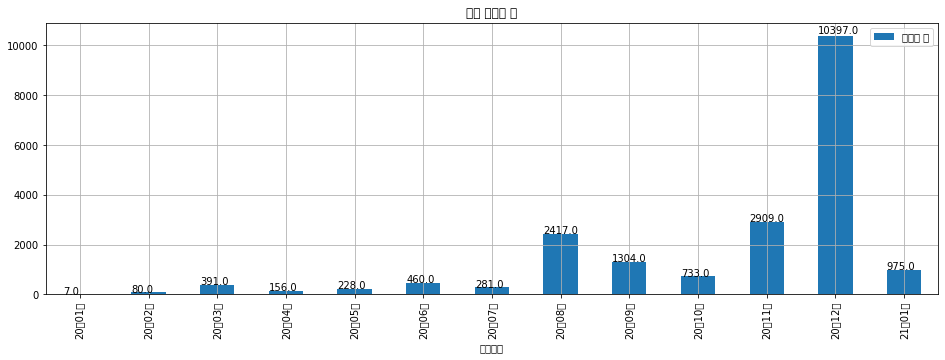

In [ ]:
ax = df_monthsgroup.plot(kind='bar', figsize=(16,5))
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x,height*1.01,height,fontsize=10,color='black')
plt.legend(['확진자 수'])
plt.title('월별 확진자 수')
plt.grid(True)

In [ ]:
# 날짜형식으로 확진일 데이터 변경
seoul['확진일']=pd.to_datetime(seoul['확진일'],format='%y-%m-%d')

In [ ]:
seoul

## 기념일 이후 확진자 추이




In [ ]:
anniversary = [['2020-02-14','Valentine',0],['2020-03-14','Whiteday',0],['2020-04-30','Buddha`s Birthday',0],['2020-05-05','Children`s Day',0],['2020-09-01','Chuseok',0],['2020-10-31','Halloween Day',0],['2020-12-25','Christmas',0]]
for id, (ymd, name,cnt) in enumerate(anniversary):
    ymd = pd.to_datetime(ymd)
    ymd_plus_2week = ymd + pd.DateOffset(days=14)
    anniversary[id][2]=seoul[(seoul['확진일'] > ymd)&(seoul['확진일'] <= ymd_plus_2week)]['확진일'].count()

In [ ]:
anniversary

[['2020-02-14', 'Valentine', 70],
 ['2020-03-14', 'Whiteday', 165],
 ['2020-04-30', 'Buddha`s Birthday', 91],
 ['2020-05-05', 'Children`s Day', 115],
 ['2020-09-01', 'Chuseok', 693],
 ['2020-10-31', 'Halloween Day', 677],
 ['2020-12-25', 'Christmas', 3269]]

In [ ]:
df_anniversary = pd.DataFrame(anniversary)
df_anniversary.columns = ['날짜','기념일 명','확진자 수']
df_anniversary = df_anniversary.set_index('기념일 명')
df_anniversary

,날짜,확진자 수
기념일 명,,
Valentine,2020-02-14,70
Whiteday,2020-03-14,165
Buddha`s Birthday,2020-04-30,91
Children`s Day,2020-05-05,115
Chuseok,2020-09-01,693
Halloween Day,2020-10-31,677
Christmas,2020-12-25,3269


In [ ]:
confirmed_virus = df_anniversary['확진자 수']
confirmed_virus

기념일 명
Valentine              70
Whiteday              165
Buddha`s Birthday      91
Children`s Day        115
Chuseok               693
Halloween Day         677
Christmas            3269
Name: 확진자 수, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

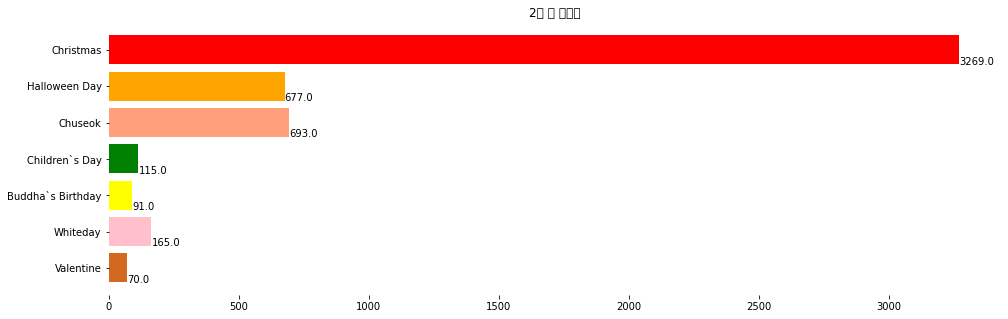

In [ ]:
colors=['chocolate','pink','yellow','green','lightsalmon','orange','red']
plt.figure(figsize=(16,5))
ax=plt.barh(df_anniversary.index,confirmed_virus, tick_label=df_anniversary.index, height=0.8, color=colors)
plt.title('2주 후 기념일')

for p in ax.patches:
    x,y,cnt,height = p.get_bbox().bounds
    plt.text(cnt,y,cnt,fontsize=10,color='black',ha='left')

plt.box(False)
plt.show()

In [ ]:
## 어떤 요일에 코로나가 제일 많이 발생했고, 제일 적게 발생했나 분석

In [ ]:
def what_day(ymd):
    ymd = pd.to_datetime(ymd)
    days = ['월', '화', '수', '목', '금', '토', '일']
    return days[ymd.dayofweek]

seoul['확진요일'] = seoul['확진일'].apply(what_day)
seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부,확진일월,확진요일
0,20338,2021-01-04,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
1,20337,2021-01-04,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
2,20336,2021-01-04,NaN,NaN,NaN,서대문구,우크라이나,해외유입,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
3,20335,2021-01-04,NaN,NaN,NaN,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
4,20334,2021-01-04,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,21년01월,월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20333,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,금
20334,4,2020-01-30,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,목
20335,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,목
20336,2,2020-01-30,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y,20년01월,목


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

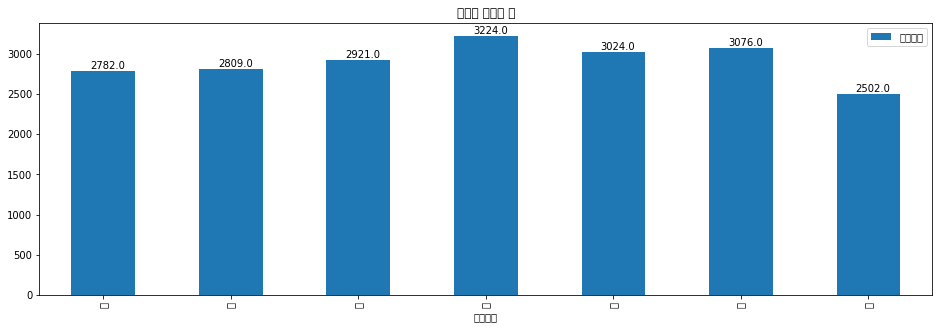

In [ ]:
days_group = seoul.groupby('확진요일')
days_group_cnt = days_group['확진요일'].count()
df_days_group = pd.DataFrame(days_group_cnt)
df_days_group = df_days_group.loc[['월','화','수','목','금','토','일'], :]
ax = df_days_group.plot(kind='bar', figsize=(16,5))
for p in ax.patches:
    x,y,weight,height = p.get_bbox().bounds
    plt.text(x+0.15,height*1.01,height,fontsize=10,color='black')
    plt.title('요일별 확진자 수')

## 사회적거리두기 단계 조정 전후 코로나 확진자 수 변화추이


In [ ]:
seoul.tail()

In [ ]:
seoul2=seoul.groupby(seoul.index)
seoul2

In [ ]:
import matplotlib as mt
plt.rcParams['font.family']='Malgun Gothic'


대표적 사회적 거리두기 시행날짜
1. 3.21~5.5 사회적 거리두기 시작
2. 5.6~ 생활속 거리두기(생활방역)
3. 8.16~ 수도권 2단계로 격상, 8.23~ 전국 2단계로 격상, 8.30~ 강화된 2단계
4. 8.30~9.13 2.5단계 
5. 9.14~9.27 2단계로 하향
6. 추석 이후 1단계로 하향
*사회적 거리두기 단계 5단계로 나뉨
7. 11.24~ 2단계 시행, 12.1~ 비수도권 1.5단계 시행
8.12.8~ 2.5단계, 비수도권 2단계


In [ ]:
#날짜별 확진자 수
seoul['확진일']=pd.to_datetime(seoul['확진일'],format='%y-%m-%d')
seoul.index=seoul['확진일']
seoul2=seoul.set_index('확진일')
bydate=seoul2.groupby(seoul2.index).count()
plt.figure(figsize=(15, 6))
plt.plot(bydate.index,bydate['연번'])
plt.show()

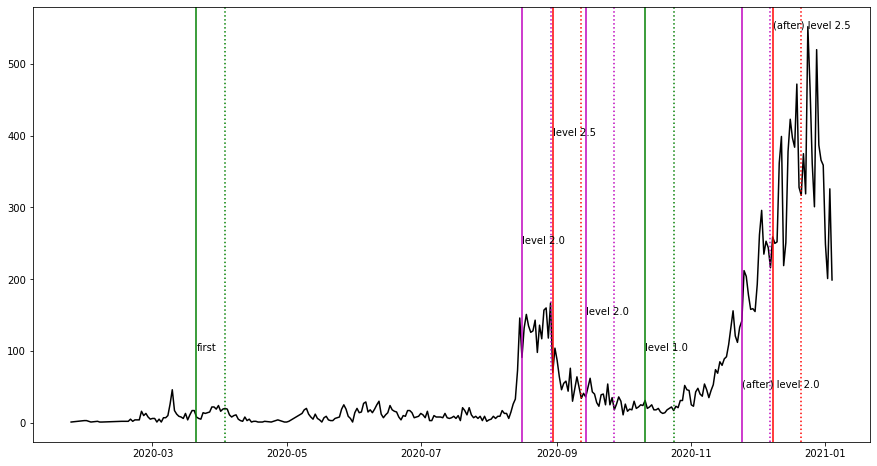

In [ ]:
#사회적 거리두기 발표와 잠복기를 함께 표시한 그래프
plt.figure(figsize=(15, 8))

plt.plot(bydate.index,bydate['연번'],c='k')

plt.axvline(x=pd.to_datetime('2020-03-21',format='%Y-%m-%d'),c='g')
plt.text(x=pd.to_datetime('2020-03-21',format='%Y-%m-%d'),y=100,s='first')
plt.axvline(x=pd.to_datetime('2020-04-03',format='%Y-%m-%d'),c='g',ls=':')


plt.axvline(x=pd.to_datetime('2020-08-16',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-08-16',format='%Y-%m-%d'),y=250,s='level 2.0')
plt.axvline(x=pd.to_datetime('2020-08-29',format='%Y-%m-%d'),c='m',ls=':')



plt.axvline(x=pd.to_datetime('2020-08-30',format='%Y-%m-%d'),c='r')
plt.text(x=pd.to_datetime('2020-08-30',format='%Y-%m-%d'),y=400,s='level 2.5')
plt.axvline(x=pd.to_datetime('2020-09-12',format='%Y-%m-%d'),c='r',ls=':')

plt.axvline(x=pd.to_datetime('2020-09-14',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-09-14',format='%Y-%m-%d'),y=150,s='level 2.0')
plt.axvline(x=pd.to_datetime('2020-09-27',format='%Y-%m-%d'),c='m',ls=':')


plt.axvline(x=pd.to_datetime('2020-10-11',format='%Y-%m-%d'),c='g')
plt.text(x=pd.to_datetime('2020-10-11',format='%Y-%m-%d'),y=100,s='level 1.0')
plt.axvline(x=pd.to_datetime('2020-10-24',format='%Y-%m-%d'),c='g',ls=':')


plt.axvline(x=pd.to_datetime('2020-11-24',format='%Y-%m-%d'),c='m')
plt.text(x=pd.to_datetime('2020-11-24',format='%Y-%m-%d'),y=50,s='(after) level 2.0')
plt.axvline(x=pd.to_datetime('2020-12-07',format='%Y-%m-%d'),c='m',ls=':')


plt.axvline(x=pd.to_datetime('2020-12-08',format='%Y-%m-%d'),c='r')
plt.text(x=pd.to_datetime('2020-12-08',format='%Y-%m-%d'),y=550,s='(after) level 2.5')
plt.axvline(x=pd.to_datetime('2020-12-21',format='%Y-%m-%d'),c='r',ls=':')
#plt.title('서울시 확진자 수 추이')

plt.show()

위 그래프를 살펴보면 대부분의 경우 사회적 거리두기 단계를 상향조정하면 잠복기(2주) 이후 확진자 수가 감소하는 것을 알 수 있다. 


하지만 추석이후(10.11) 1단계로 하향조정되자마자 확진자 수가 늘어나는 것을 볼 수 있다. 이 증가추세는 겨울이 다가오며 공기가 차가워져 바이러스가 더 오래 살아남을 수 있는 환경적 요인과 사회적 거리두기가 하향조정의 결과로 볼 수 있다.


이후 겨울이 본격적으로 시작되면서부터는 연말이라는 점과 겨울이라는 환경적 요인이 겹쳐 거리두기 효과가 더디게 나타나고 있다는 것을 알 수 있다.

In [ ]:
level_announc=[['2020-03-21','first social distancing',0],['2020-08-16','level 2.0',0],['2020-08-30','level 2.5',0],['2020-09-14','level 2.0',0],['2020-10-11','level 1.0',0],['2020-11-24','level 2.0',0],['2020-12-08','level 2.5',0]]

for id, (date, announc, cnt) in enumerate(level_announc):
  date=pd.to_datetime(date)
  date_2week=date+pd.DateOffset(days=14)
  level_announc[id][2]=seoul[(seoul['확진일']>date)&(seoul['확진일']<=date_2week)]['확진일'].count() 

level_announc

level_announc_df=pd.DataFrame(level_announc,columns=['date','level','count'])
level_announc_df

,date,level,count
0,2020-03-21,first social distancing,228
1,2020-08-16,level 2.0,1838
2,2020-08-30,level 2.5,799
3,2020-09-14,level 2.0,507
4,2020-10-11,level 1.0,265
5,2020-11-24,level 2.0,3024
6,2020-12-08,level 2.5,4807


In [ ]:
level_announc_bf=[['2020-03-21','first social distancing',0],['2020-08-16','level 2.0',0],['2020-08-30','level 2.5',0],['2020-09-14','level 2.0',0],['2020-10-11','level 1.0',0],['2020-11-24','level 2.0',0],['2020-12-08','level 2.5',0]]

for id, (date, announc, cnt) in enumerate(level_announc_bf):
  date=pd.to_datetime(date)
  date_2week_bf=date-pd.DateOffset(days=14)
  level_announc_bf[id][2]=seoul[(seoul['확진일']>date_2week_bf)&(seoul['확진일']<=date)]['확진일'].count()

level_announc_bf_df=pd.DataFrame(level_announc_bf,columns=['date','level','count'])
level_announc_bf_df

,date,level,count
0,2020-03-21,first social distancing,204
1,2020-08-16,level 2.0,466
2,2020-08-30,level 2.5,1838
3,2020-09-14,level 2.0,731
4,2020-10-11,level 1.0,334
5,2020-11-24,level 2.0,1447
6,2020-12-08,level 2.5,3024


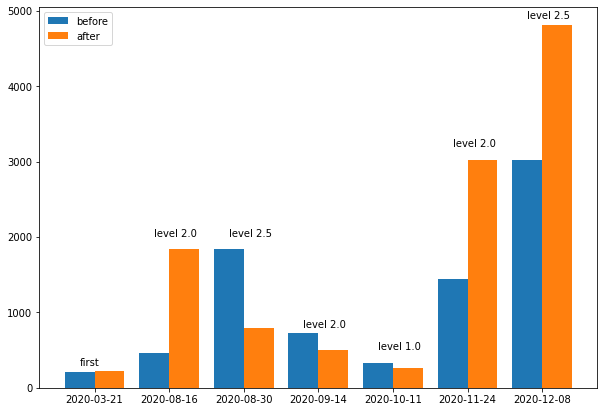

In [ ]:
date=['2020-03-21','2020-08-16','2020-08-30','2020-09-14','2020-10-11','2020-11-24','2020-12-08']
index=np.arange(len(date))
plt.figure(figsize=(10, 7))
plt.bar(index,level_announc_bf_df['count'],align='edge',width=0.4,label='before')
plt.bar(index+0.4,level_announc_df['count'],align='edge',width=0.4,label='after')

plt.xticks(index+0.4,date)
plt.text(index[0]+0.2,300,'first')
plt.text(index[1]+0.2,2000,'level 2.0')
plt.text(index[2]+0.2,2000,'level 2.5')
plt.text(index[3]+0.2,800,'level 2.0')
plt.text(index[4]+0.2,500,'level 1.0')
plt.text(index[5]+0.2,3200,'level 2.0')
plt.text(index[6]+0.2,4900,'level 2.5')

plt.legend()
#plt.title('사회적거리두기 실행 전후(2주) 확진자 수 비교')
#plt.xlabel('사회적 거리두기 시행 발표일자')
#plt.ylabel('확진자 수')
plt.show()

사회적 거리두기 시행 시점 기준 2주전(before)까지의 확진자 수와 2주후(after)까지의 확진자 수를 막대그래프로 비교해보면 여름에 시행되었던 사회적 거리두기는 효과가 좋았다는 것을 알 수 있다. 하지만 10월 중순부터 확진자 수가 큰 폭으로 증가했고 이는 사회적 거리두기 단계를 격상해도 여름처럼 눈에 띄게 확진자 수가 감소하지는 않는 것을 볼 수 있다. 

In [ ]:
res=pd.merge(level_announc_bf_df,level_announc_df,on='date')
res

,date,level_x,count_x,level_y,count_y
0,2020-03-21,first social distancing,204,first social distancing,228
1,2020-08-16,level 2.0,466,level 2.0,1838
2,2020-08-30,level 2.5,1838,level 2.5,799
3,2020-09-14,level 2.0,731,level 2.0,507
4,2020-10-11,level 1.0,334,level 1.0,265
5,2020-11-24,level 2.0,1447,level 2.0,3024
6,2020-12-08,level 2.5,3024,level 2.5,4807


구체적인 수치로 거리두기 시행 전후 확진자 수를 비교해보면 그래프와 마찬가지로 겨울에 비해 여름에 거리두기 효과가 매우 좋았다는 것을 알 수 있다. 수치를 비교해서 새롭게 알 수 있는 사실은 겨울에 거리두기 효과가 눈에 띄지는 않았으나 거리두기 2.5단계 격상 전인 11월 말에는 2주동안 2배가 넘게 확진자 수가 증가했으나 격상 후인 12월 중순에는 증가폭이 훨씬 줄어든것을 볼 수 있다.

## 지역구별 확진자 데이터 분석


In [ ]:
seoul = pd.read_csv('drive/MyDrive/corona/서울시 코로나19 확진자 현황.csv',encoding='utf-8')
seoul.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [ ]:
seoul.isna().sum()

연번          0
확진일         0
환자번호    20338
국적      20338
환자정보    20338
지역         57
여행력     19662
접촉력         0
조치사항    20338
상태       8270
이동경로     4449
등록일         0
수정일         0
노출여부        0
dtype: int64

In [ ]:
!pip install wordcloud
import matplotlib.font_manager as fm  # 폰트 관련 용도
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq
# plt.rcParams['font.family'] = 'NanumSquareL'# '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False


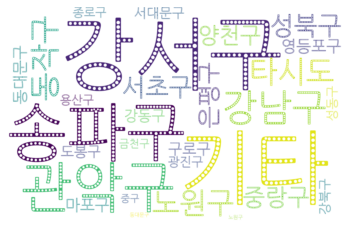

In [ ]:
region = seoul.drop(['환자번호','국적','조치사항','환자정보'],axis=1)
region

## 코로나 발생 이후 ~ 1월 4일까지 전체 지역별 확진자
region_len = region.groupby('지역')['연번'].count().sum()
region_count = region.groupby('지역')['연번'].count()
region_count = pd.DataFrame(region_count)

wc = WordCloud(background_color='white',font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',width=1250,height=800)
frequencies = region_count['연번']
wordcloud_image = wc.generate_from_frequencies(frequencies)
# 생성한 워드 클라우드 이미지를 화면에 표시
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
## 접촉력에 따른 확진자 데이터 시각화
region = seoul.drop(['환자번호','국적','조치사항','환자정보'],axis=1)
region['접촉력'] = region['접촉력'].astype(str)

def getHisyType1(s):
    if len(s) > 2 and (s[:2] == '중구'):
        return s[:2]
    if len(s) > 3 and (s[2] == '구') and (s[3] == ' '): 
        return s[:3]
    elif len(s) > 4 and (s[3] == '구'):
        return s[:4]
    else:
        return '기타'

def getHisyType2(s):
    if (s == '감염경로 조사 중') | (s == '감염경로 조사중') | (s == '감염경로조사중'):
        return '감염경로조사중'
    elif (s == '확인중') | (s=='확인 중'):
        return '확인중'
    elif (s == '해외 유입') | (s == '해외 유입') | (s[:3] == '해외') | (s == '해외 접촉 추정'):
        return '해외유입'
    elif (s[2] == '구') and (s[3] == ' '): 
        return '지역구 관련'
    elif s[3] == '구':
        return '지역구 관련'
    elif (s == '접촉(추정)') | (s == '접촉 추정') | (s == '접촉(추정)') | (s[-2:] == '접촉') | (s[-6:] == '접촉(추정)') | (s[-3:]=='접촉자') | (s[-5:] == '접촉 추정'):
        return '접촉(추정)'
    elif (s[-2:] == '모임'):
        return '모임'
    else:
        return s

In [ ]:
histType =  region['접촉력'].apply(getHisyType1).value_counts()
histType

In [ ]:
df_histType = pd.DataFrame(histType[1:])
df_histType

,접촉력
성북구,763
강서구,671
강남구,497
구로구,445
동대문구,358
송파구,290
종로구,272
서초구,240
동작구,227
영등포구,200


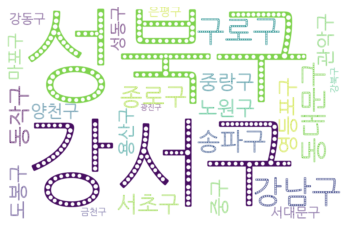

In [ ]:
wc = WordCloud(background_color='white',font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',width=1250,height=800)
frequencies = histType[1:]
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def getHisyType3(s):
    if (s == '감염경로 조사 중') | (s == '감염경로 조사중') | (s == '감염경로조사중'):
        return 't'
    elif (s == '확인중') | (s=='확인 중'):
        return 't'
    elif (s == '해외 유입') | (s == '해외 유입') | (s[:3] == '해외') | (s == '해외 접촉 추정'):
        return 't'
    elif (s[2] == '구') and (s[3] == ' '): 
        return 't'
    elif s[3] == '구':
        return 't'
    elif (s == '접촉(추정)') | (s == '접촉 추정') | (s == '접촉(추정)') | (s[-2:] == '접촉') | (s[-6:] == '접촉(추정)') | (s[-3:]=='접촉자') | (s[-5:] == '접촉 추정'):
        return 't'
    elif (s[-2:] == '모임'):
        return '지인 및 모임'
    else:
        return s

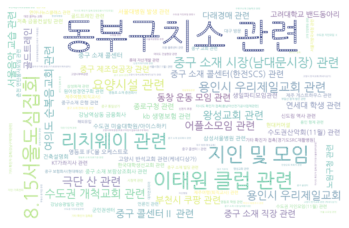

In [ ]:
# histType[2:].head(60)
histType2 =  region['접촉력'].apply(getHisyType3).value_counts()
# histType2 = pd.DataFrame(histType[2:])
id_histType2 = histType2.index
id_histType2

df_histType2 = pd.DataFrame(histType2[1:])
wc = WordCloud(background_color='white',font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',width=1250,height=800)
frequencies = histType2[1:]
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df_histType2.head(10)

,접촉력
동부구치소 관련,1069
이태원 클럽 관련,139
지인 및 모임,136
8.15서울도심집회,126
리치웨이 관련,119
요양시설 관련,43
중구 소재 시장(남대문시장) 관련,42
용인시 우리제일교회 관련,41
극단 산 관련,37
수도권 개척교회 관련,37


### 특정 접촉력 요인에 따른 지역구별 확진자 분석

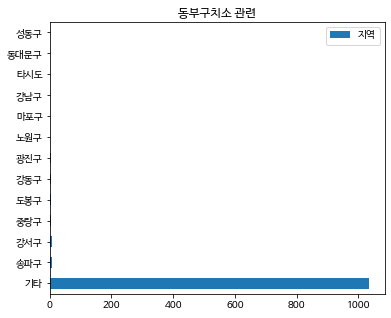

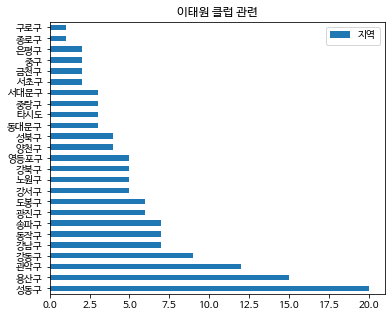

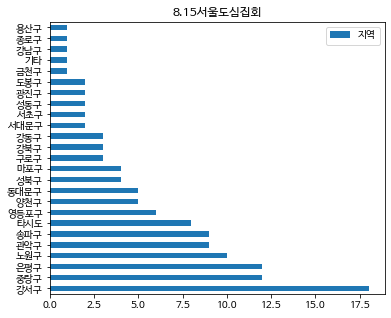

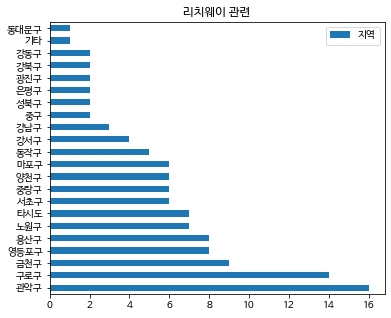

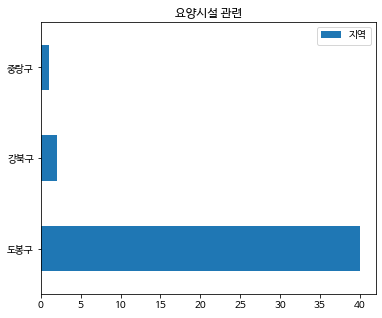

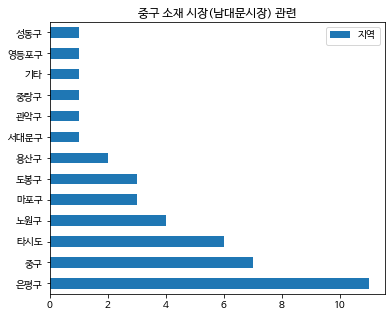

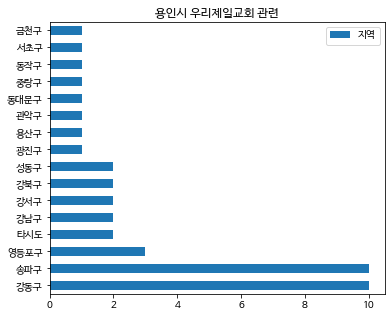

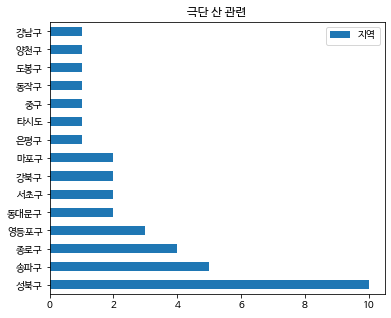

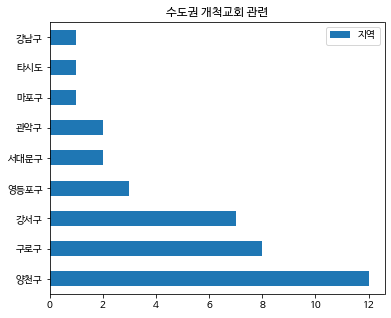

In [ ]:
# df_list = []
# for i in range(0,10):
#     sr = pd.DataFrame(region[region['접촉력'] == histType2[5:].index[i]]['지역'].value_counts())
#     df_list.append(sr)

# nrow = 2; ncol = 5; count = 0
# for r in range(nrow):
#     for c in range(ncol):
#         if df_list[count].count().sum() != 0:
#             plt.rc('font', family='NanumBarunGothic')
#             df_list[count].plot.barh(ax=axes[r,c])
#             # df_list[count].figure.set_figheight(9)
#             count += 1

for i in range(0, 10):
    typeName = histType2[1:].index[i]
    sr = pd.DataFrame(region[region['접촉력'] == histType2[1:].index[i]]['지역'].value_counts())
    if sr.count().sum() != 0:
        plt.rc('font', family='NanumBarunGothic') 
        a = sr.plot.barh()
        a.figure.set_figheight(5)
        a.set_title(typeName)
plt.show()    
